## Introduction

Pada case ini kita akan menganalisa kelayakan kredit bagi pelanggan dengan mengklasifikasikan customer yg gagal bayar dan tidak dengan data historis pinjaman

# Content

# List of check point

1. CP #1 : Preparation (v)
2. CP #2 : Data Quick look (v)
3. CP #3 : Miscellaneous Handling (v)
4. CP #4 : Selection & Subset (x)
5. CP #5 : Transformation (v)
6. CP #6 : Joining table (x)
7. CP #7 : Aggregation & Sorting (x)
8. CP #8 : Visualization (v)
9. CP #9 : Dummy Var & Split Data (v)
10. CP #10 : Modeling (v)

# Install Load Library

CP #1 Preparation


1.   Melakukan pengecekan sistem
2.   Melakukan library Loading
3.   Melakukan data set loading


In [2]:
# Mengecek python package version
!pip check

ipython 7.34.0 requires jedi, which is not installed.
pygobject 3.42.1 requires pycairo, which is not installed.


In [3]:
!pip freeze
!pip install dalex
!pip install scikit-plot


absl-py==1.4.0
accelerate==1.1.1
aiohappyeyeballs==2.4.3
aiohttp==3.11.2
aiosignal==1.3.1
alabaster==1.0.0
albucore==0.0.19
albumentations==1.4.20
altair==4.2.2
annotated-types==0.7.0
anyio==3.7.1
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.5.1
arviz==0.20.0
astropy==6.1.6
astropy-iers-data==0.2024.11.18.0.35.2
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.1.0
attrs==24.2.0
audioread==3.0.1
autograd==1.7.0
babel==2.16.0
backcall==0.2.0
beautifulsoup4==4.12.3
bigframes==1.27.0
bigquery-magics==0.4.0
bleach==6.2.0
blinker==1.9.0
blis==0.7.11
blosc2==2.7.1
bokeh==3.6.1
Bottleneck==1.4.2
bqplot==0.12.43
branca==0.8.0
CacheControl==0.14.1
cachetools==5.5.0
catalogue==2.0.10
certifi==2024.8.30
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.4.0
chex==0.1.87
clarabel==0.9.0
click==8.1.7
cloudpathlib==0.20.0
cloudpickle==3.1.0
cmake==3.30.5
cmdstanpy==1.2.4
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.5
cons==0.4.6
contourpy==1.

In [4]:
pip install mljar-scikit-plot

  Preparing metadata (setup.py) ... done
  Created wheel for mljar-scikit-plot: filename=mljar_scikit_plot-0.3.12-py3-none-any.whl size=32014 sha256=c80228f896a41237051487210c6690b4d316258c24f9d2076a87312b9b421608
  Stored in directory: /root/.cache/pip/wheels/f1/02/59/22b0e9bcc992a79df54193032d45720f9713bd3065617ef4a5
Successfully built mljar-scikit-plot


In [5]:
# Load pandas untuk data wrangling
import pandas as pd
# Load numpy untuk manipulasi vektor
import numpy as np
# Load matplotlib untuk visualisasi data
import matplotlib.pyplot as plt
# Load seaborn untuk visualisasi data
import seaborn as sns

# Load metrics object dari sklearn
from sklearn import metrics
# Load train-test data splitter
from sklearn.model_selection import train_test_split
# Load Decision Tree classifier model
from sklearn.tree import DecisionTreeClassifier
# Load Random Forest classifier model
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
# Load SVM classifier model
from sklearn.svm import SVC
# Load KNN classifier model
from sklearn.neighbors import KNeighborsClassifier
# Load logistic regression model
from sklearn.linear_model import LogisticRegression
# Load xgboost classifier model
from xgboost import XGBClassifier

# Load DALEX untuk interpretability
import dalex as dx

%matplotlib inline

In [6]:
import scikitplot as skplt

In [7]:
# Load Dataset

In [8]:
loan_data = pd.read_csv('/content/drive/MyDrive/lc_2016_2017.csv')

<ipython-input-8-5311c85e681b>:1: DtypeWarning: Columns (18,54) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data = pd.read_csv('/content/drive/MyDrive/lc_2016_2017.csv')


# Data Inspection

CP #2 Data Quick Look
1. Quick look

CP #3 Miscellaneous Handling
1. Change colomn names (If necessary)
2. Data tyoe adjustment (If necessary)
3. Handling missing and duplicated data (If necessary)

In [9]:
#quick look
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759338 entries, 0 to 759337
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           759338 non-null  int64  
 1   member_id                    0 non-null       float64
 2   loan_amnt                    759338 non-null  int64  
 3   funded_amnt                  759338 non-null  int64  
 4   funded_amnt_inv              759338 non-null  float64
 5   term                         759338 non-null  object 
 6   int_rate                     759338 non-null  float64
 7   installment                  759338 non-null  float64
 8   grade                        759338 non-null  object 
 9   sub_grade                    759338 non-null  object 
 10  emp_title                    708368 non-null  object 
 11  emp_length                   708975 non-null  object 
 12  home_ownership               759338 non-null  object 
 13 

In [10]:
#cek kolom yang unik
for col in loan_data.columns:
    print("unique value {} and number of unique is {}".format(col,loan_data[col].nunique()))
    print("{}".format(loan_data[col].unique()))
    print("=="*100)

unique value id and number of unique is 759338
[112435993 112290210 112436985 ...  66141895  65673209  65744272]
unique value member_id and number of unique is 0
[nan]
unique value loan_amnt and number of unique is 1557
[ 2300 16000  6025 ... 35175 35850 39025]
unique value funded_amnt and number of unique is 1557
[ 2300 16000  6025 ... 35175 35850 39025]
unique value funded_amnt_inv and number of unique is 1567
[ 2300.         16000.          6025.         ...   775.
   800.         31496.16546498]
unique value term and number of unique is 2
['36 months' '60 months']
unique value int_rate and number of unique is 168
[12.62 15.05  9.44 11.99 10.42  7.35  7.97 24.85  9.93 10.91  7.21 14.08
 30.65  5.32 16.02  7.07 21.45 23.88 13.59 18.06 17.09 19.03 30.79 30.17
 20.   26.3  25.82 30.84 30.75 29.69 22.91 30.89 30.94 28.72 30.99  6.
 15.99 13.49 18.99 11.39  7.99 13.99 22.74 12.74 24.74  7.49 11.49 14.99
 16.99  8.24 25.49 19.99 26.24 10.49  6.99 28.69  7.24 11.44 29.49 17.99
 29.99 30.49

Kolom yg perlu dibersihkan:
1. Term --> menghapus month
2. Emp length --> menghapus years
3. Mengubah data type issue_id, earliest_cr_line, last_payment_id, next_payment_id, last credit_pull

In [11]:
col_need_to_clean = ['term', 'emp_length', 'issue_d', 'earliest_cr_line', 'last_pymnt_d',
                    'next_pymnt_d', 'last_credit_pull_d']

In [12]:
# Menghilangkan ' months' menjadi ''
loan_data['term'].str.replace(' months', '')
loan_data['term'] = pd.to_numeric(loan_data['term'].str.replace(' months', ''))

In [13]:
loan_data['emp_length'] = loan_data['emp_length'].str.replace('\+ years', '')
loan_data['emp_length'] = loan_data['emp_length'].str.replace(' years', '')
loan_data['emp_length'] = loan_data['emp_length'].str.replace('< 1 year', str(0))
loan_data['emp_length'] = loan_data['emp_length'].str.replace(' year', '')
# This line is added to address the issue causing the ValueError
loan_data['emp_length'] = loan_data['emp_length'].str.replace('+', '') # Remove '+' characters

loan_data['emp_length'].fillna(value = 0, inplace=True)
loan_data['emp_length'] = pd.to_numeric(loan_data['emp_length'])

<ipython-input-13-9c1c7a25d40f>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_data['emp_length'].fillna(value = 0, inplace=True)


In [14]:
# Cek feature date
col_date = ['issue_d', 'earliest_cr_line', 'last_pymnt_d',
                    'next_pymnt_d', 'last_credit_pull_d']

loan_data[col_date]

,issue_d,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d
0,Jun-2017,Sep-1985,Dec-2017,Jan-2018,Dec-2017
1,Jun-2017,Jun-1992,Dec-2017,Jan-2018,Dec-2017
2,Jun-2017,Jun-2002,Dec-2017,Jan-2018,Dec-2017
3,Jun-2017,Jan-2007,Dec-2017,Jan-2018,Dec-2017
4,Jun-2017,Feb-2002,Dec-2017,Jan-2018,Dec-2017
...,...,...,...,...,...
759333,Jan-2016,Feb-2006,Dec-2017,Jan-2018,Dec-2017
759334,Jan-2016,Sep-1997,Dec-2017,Jan-2018,Dec-2017
759335,Jan-2016,Oct-1976,Nov-2017,Jan-2018,Dec-2017
759336,Jan-2016,Nov-2005,Dec-2017,Jan-2018,Dec-2017


In [15]:
for col in col_date:
    loan_data[col] = pd.to_datetime(loan_data[col])

<ipython-input-15-511b351e5636>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  loan_data[col] = pd.to_datetime(loan_data[col])
<ipython-input-15-511b351e5636>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  loan_data[col] = pd.to_datetime(loan_data[col])
<ipython-input-15-511b351e5636>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  loan_data[col] = pd.to_datetime(loan_data[col])
<ipython-input-15-511b351e5636>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected,

# Cek Missing Value

In [16]:
loan_data.isnull().sum()

,0
id,0
member_id,759338
loan_amnt,0
funded_amnt,0
funded_amnt_inv,0
...,...
all_util,114
total_rev_hi_lim,0
inq_fi,61
total_cu_tl,62


# Missing Values
Feature yang memiliki missing values lebih dari 50% akan di drop, karena jika ingin diisi dengan nilai lain seperti median atau mean, maka errornya akan sangat tinggi. Lebih baik di drop agar tidak membuat model semakin tidak akurat.

In [17]:
# Melihat feature apa saja yang memiliki missing value lebih dari 50%
missing_values = pd.DataFrame(loan_data.isnull().sum()/loan_data.shape[0])
missing_values = missing_values[missing_values.iloc[:,0] > 0.50]
missing_values.sort_values([0], ascending=False)

,0
member_id,1.000000
desc,0.999978
dti_joint,0.955223
annual_inc_joint,0.955220
verification_status_joint,0.955220
mths_since_last_record,0.814076
mths_since_last_major_derog,0.716720


In [18]:
# Drop feature tersebut
loan_data.dropna(thresh = loan_data.shape[0]*0.5, axis=1, inplace=True)

Target Variabel

Dikarenakan kita akan mengklasifikasikan data menjadi 2; Good Loan (0) dan Bad Loan (1). Dengan menggunakan data dari Loan_Status dengan membuat kolom baru.

In [19]:
# Melihat unique values pada feature loan_status
loan_data.loan_status.unique()

array(['Current', 'Fully Paid', 'In Grace Period', 'Late (31-120 days)',
       'Late (16-30 days)', 'Charged Off', 'Default'], dtype=object)

In [20]:
loan_data['good_bad'] = np.where(loan_data.loc[:, 'loan_status'].isin(['Charged Off',
                                                                   'Default', 'Late (31-120 days)', 'Late (16-30 days)'])
                                , 1 , 0)

Kita telah membuat kolom baru yaitu Good_Bad untuk mengkategorikan setiap customer menjadi 2 golongan. Dengan bad loan (1) dan Good Loan (0)

In [21]:
# Melihat distribusi 0 dan 1
loan_data.good_bad.value_counts()

,count
good_bad,
0,702875
1,56463


In [22]:
loan_data.good_bad.value_counts(normalize=True)

,proportion
good_bad,
0,0.925642
1,0.074358


#Interpretasi

Jika dilihat dari data distribusinya:
1. pelanggan dengan bad loan (1) sebanyak 56.463
2. pelanggan dengan Good loan (0) sebanyak 702,875

Dilihat dari proposinya dapat disimpulkan:
1. Customer dengan status Good Loan (0) sebanyak 93%
2. Customer dengan status Bad Loan (1) sebanyak 7%




# Train Test Split Data

CP #9 Dummy Var & Split Data

1. Dummy Var
2. Randomly Split data to create Training and Testing data

In [23]:
# Membagi data menjadi 80/20 dengan menyamakan distribusi dari bad loans di test set dengan train set.
X = loan_data.drop('good_bad', axis=1)
y = loan_data['good_bad']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size= 0.2,
    stratify= y,
    random_state=42
    )

#Exploratory Data Analysis

CP #8 : Visualization
Viz for Numerical
Viz for Categorical Var

In [24]:
# Buat kolom good_bad pada X_train dengan memasukkan nilai y_train ke dalamnya
X_train["good_bad"] = y_train

<Axes: xlabel='good_bad', ylabel='count'>

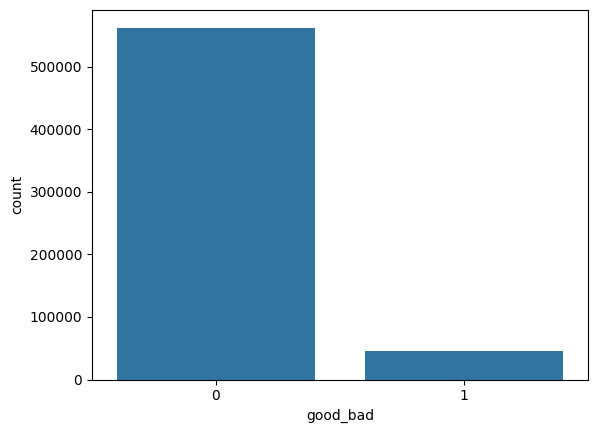

In [25]:
# Cek distribusi kelas target

# Pengecekan variabel good bad
sns.countplot(data = X_train, x = "good_bad")

In [26]:
# Pengecekan proporsi variabel Good Bad
X_train['good_bad'].value_counts(normalize=True)

,proportion
good_bad,
0,0.925642
1,0.074358


Interpretasi

Berdasarkan hasil visualisasi, maka dapat diketahui:
* Data customer yg dapat dikategorikan "dapat bayar" ada 702875 customer
* Data customer yg dapat dikategorikan "Gagal bayar" ada 56463
* Proposi jumlah data customer yg dapat bayar dan gagal bayar sebesar 93% dan 7%.

Tujuan pada case ini adalah menentukan model yg tepat untuk menganalisis kelayakan kredit pada setiap customer untuk mitigasi gagal bayar pada customer.

In [27]:
X_train.shape

(607470, 66)

In [28]:
for col in X_train.select_dtypes(include= ['object','bool']).columns:
    print(col)
    print(X_train[col].unique())
    print()

grade
['C' 'A' 'B' 'E' 'D' 'G' 'F']

sub_grade
['C1' 'A1' 'B1' 'B5' 'A4' 'E2' 'A5' 'D1' 'C4' 'C3' 'G3' 'D3' 'E1' 'C5'
 'D2' 'C2' 'A2' 'E3' 'D5' 'E4' 'B2' 'F2' 'B4' 'A3' 'D4' 'B3' 'F1' 'F5'
 'G2' 'E5' 'F3' 'G1' 'G5' 'F4' 'G4']

emp_title
['Administrative assistant' 'director of workforce development' 'Nanny'
 ... 'Operations Planning Manager' 'Sr. xPression Developer'
 'making plant planner']

home_ownership
['MORTGAGE' 'RENT' 'OWN' 'ANY' 'NONE']

verification_status
['Source Verified' 'Not Verified' 'Verified']

loan_status
['Current' 'Fully Paid' 'Late (16-30 days)' 'Charged Off'
 'Late (31-120 days)' 'In Grace Period' 'Default']

pymnt_plan
['n' 'y']

purpose
['debt_consolidation' 'credit_card' 'home_improvement' 'other' 'moving'
 'vacation' 'medical' 'major_purchase' 'small_business' 'car' 'house'
 'renewable_energy' 'wedding']

title
['Debt consolidation' 'Credit card refinancing' 'Home improvement' 'Other'
 'Moving and relocation' 'Vacation' 'Medical expenses' 'Major purchase'
 'B

In [29]:
col_need_to_clean = ['term', 'emp_length', 'issue_d', 'earliest_cr_line', 'last_pymnt_d',
                    'next_pymnt_d', 'last_credit_pull_d']


In [30]:
X_train['term'] = X_train['term'].astype(str)

# Now you can use .str.replace
X_train['term'] = X_train['term'].str.replace(' months', '')


In [31]:
# Convert data type menjadi numeric
X_train['term'] = pd.to_numeric(X_train['term'].str.replace(' months', ''))
X_train['term']

,term
147577,36
505776,36
412425,36
618730,36
111143,36
...,...
150426,36
195135,36
182511,36
82596,36


In [32]:
# Convert 'emp_length' column to string type before using .str accessor
X_train['emp_length'] = X_train['emp_length'].astype(str)

# Now proceed with your string replacements
X_train['emp_length'] = X_train['emp_length'].str.replace('\+ years', '')
X_train['emp_length'] = X_train['emp_length'].str.replace(' years', '')
X_train['emp_length'] = X_train['emp_length'].str.replace('< 1 year', str(0))
X_train['emp_length'] = X_train['emp_length'].str.replace(' year', '')

X_train['emp_length'].fillna(value = 0, inplace=True)
X_train['emp_length'] = pd.to_numeric(X_train['emp_length'])

<ipython-input-32-8c90d257ed2e>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['emp_length'].fillna(value = 0, inplace=True)


In [33]:
X_train['emp_length']

,emp_length
147577,4
505776,10
412425,0
618730,5
111143,6
...,...
150426,8
195135,0
182511,10
82596,3


In [34]:
# Cek feature date
col_date = ['issue_d', 'earliest_cr_line', 'last_pymnt_d',
                    'next_pymnt_d', 'last_credit_pull_d']

X_train[col_date]

,issue_d,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d
147577,2017-02-01,1994-08-01,2017-12-01,2018-01-01,2017-12-01
505776,2016-04-01,2001-09-01,2017-07-01,NaT,2017-11-01
412425,2017-07-01,1999-05-01,2017-12-01,2018-01-01,2017-12-01
618730,2016-10-01,2005-06-01,2017-12-01,2018-01-01,2017-12-01
111143,2017-03-01,2012-01-01,2017-12-01,2018-01-01,2017-12-01
...,...,...,...,...,...
150426,2017-02-01,1998-11-01,2017-11-01,NaT,2017-12-01
195135,2017-01-01,1993-09-01,2017-12-01,2018-01-01,2017-12-01
182511,2017-01-01,1988-03-01,2017-12-01,2018-01-01,2017-12-01
82596,2017-04-01,2003-01-01,2017-12-01,2018-01-01,2017-12-01


In [35]:
for col in col_date:
    X_train[col] = pd.to_datetime(X_train[col])

In [36]:
# Lakukan hal yang sama untuk X_test

X_test['term'] = X_test['term'].astype(str)
X_test['term'] = pd.to_numeric(X_test['term'].str.replace(' months', ''))

X_test['emp_length'] = X_test['emp_length'].astype(str)

X_test['emp_length'] = X_test['emp_length'].str.replace('\+ years', '')
X_test['emp_length'] = X_test['emp_length'].str.replace(' years', '')
X_test['emp_length'] = X_test['emp_length'].str.replace('< 1 year', str(0))
X_test['emp_length'] = X_test['emp_length'].str.replace(' year', '')

X_test['emp_length'].fillna(value = 0, inplace=True)
X_test['emp_length'] = pd.to_numeric(X_test['emp_length'])

for col in col_date:
    X_test[col] = pd.to_datetime(X_test[col])

<ipython-input-36-c463e928f387>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_test['emp_length'].fillna(value = 0, inplace=True)


In [37]:
# Check apakah berhasil di cleaning
X_test[col_need_to_clean].info()

<class 'pandas.core.frame.DataFrame'>
Index: 151868 entries, 280647 to 267584
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   term                151868 non-null  int64         
 1   emp_length          151868 non-null  int64         
 2   issue_d             151868 non-null  datetime64[ns]
 3   earliest_cr_line    151868 non-null  datetime64[ns]
 4   last_pymnt_d        151655 non-null  datetime64[ns]
 5   next_pymnt_d        118276 non-null  datetime64[ns]
 6   last_credit_pull_d  151867 non-null  datetime64[ns]
dtypes: datetime64[ns](5), int64(2)
memory usage: 9.3 MB


In [38]:
X_test.isnull().sum()

,0
id,0
loan_amnt,0
funded_amnt,0
funded_amnt_inv,0
term,0
...,...
all_util,29
total_rev_hi_lim,0
inq_fi,17
total_cu_tl,17


In [39]:
X_train.isnull().sum()

,0
id,0
loan_amnt,0
funded_amnt,0
funded_amnt_inv,0
term,0
...,...
total_rev_hi_lim,0
inq_fi,44
total_cu_tl,45
inq_last_12m,45


Feature Engineering

In [40]:

col_need_to_clean

['term',
 'emp_length',
 'issue_d',
 'earliest_cr_line',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d']

In [41]:
X_train = X_train[col_need_to_clean]
X_test = X_test[col_need_to_clean]

In [42]:
# tidak dibutuhkan untuk feature engineering
del X_train['next_pymnt_d']
del X_test['next_pymnt_d']

In [43]:
X_train.shape, X_test.shape

((607470, 6), (151868, 6))

In [44]:
from datetime import date

date.today().strftime('%Y-%m-%d')

'2024-12-01'

In [45]:
import pandas as pd
import numpy as np
from datetime import date

def date_columns(df, column):
    today_date = pd.to_datetime(date.today().strftime('%Y-%m-%d'))
    df[column] = pd.to_datetime(df[column], format = "%b-%y")
    # Calculate the difference in days and divide by the average days per month (30.4375)
    df['mths_since_' + column] = round(pd.to_numeric((today_date - df[column]).dt.days / 30.4375))
    df.drop(columns = [column], inplace=True)

# apply to X_train
date_columns(X_train, 'earliest_cr_line')
date_columns(X_train, 'issue_d')
date_columns(X_train, 'last_pymnt_d')
date_columns(X_train, 'last_credit_pull_d')

In [46]:
# apply to X_test
date_columns(X_test, 'earliest_cr_line')
date_columns(X_test, 'issue_d')
date_columns(X_test, 'last_pymnt_d')
date_columns(X_test, 'last_credit_pull_d')

In [47]:
X_test.isnull().sum()

,0
term,0
emp_length,0
mths_since_earliest_cr_line,0
mths_since_issue_d,0
mths_since_last_pymnt_d,213
mths_since_last_credit_pull_d,1


In [48]:
X_train.isnull().sum()

,0
term,0
emp_length,0
mths_since_earliest_cr_line,0
mths_since_issue_d,0
mths_since_last_pymnt_d,735
mths_since_last_credit_pull_d,17


In [49]:
X_train.fillna(X_train.median(), inplace=True)
X_test.fillna(X_test.median(), inplace=True)

Modelling

CP #10 Modeling
Train Model
Evaluate Model

#Define Model

Logistic Regression

In [50]:
# Mendefinisikan model Logistic Regression
model = LogisticRegression()

Decision Tree

In [51]:
dt_model = DecisionTreeClassifier(max_depth=5, ccp_alpha=0.001)

Fitting Model to Data

Logistic Regression

In [52]:
model.fit(X_train, y_train)


LogisticRegression()

Decision Tree

In [53]:
# Men-fit Decision Tree model dengan data X_train dan y_train
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=5)

Model Evaluation

Logistic Regression

In [54]:
# Logistic Regression prediction

# Menghasilkan hard prediction dari Logistic Regression model menggunakan X_test
loreg_result = model.predict(X_test)

# Menghasilkan probability prediction dari Logistic Regression model menggunakan X_test
loreg_proba = model.predict_proba(X_test)

Classfication Report

In [55]:
# Menegecek classification report
pd.DataFrame(metrics.classification_report
 (y_test, loreg_result, target_names=[0,1],
                                           output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.929862,0.286631,0.917316,0.608246,0.882031
recall,0.984969,0.075179,0.917316,0.530074,0.917316
f1-score,0.956622,0.119116,0.917316,0.537869,0.894345
support,140575.000000,11293.000000,0.917316,151868.000000,151868.000000


Interpretasi

Mengingat saat dilakukan EDA nilai 0 dan 1 sebesar 93% dan 7%. dan pada nilai precision, proporsi perbandingan 0 dan 1 sebesar 92,9 atau 93% dan 2,8 atau 3%

Confusion matrik

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

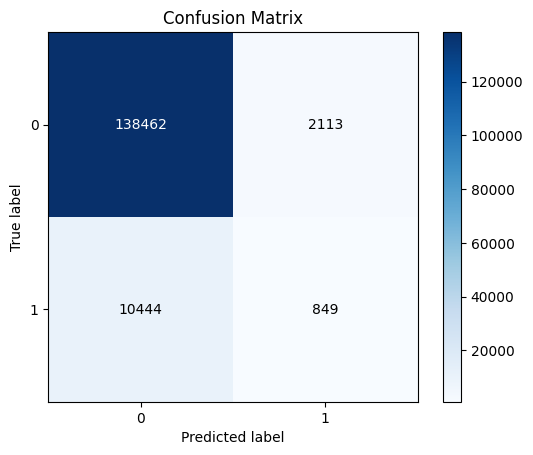

In [60]:
skplt.metrics.plot_confusion_matrix(y_test, loreg_result)

Decision Tree

In [56]:
# Decision Tree Prediction
## Menghasilkan hard prediction dari Decision Tree model menggunakan X_test
dt_result = dt_model.predict(X_test)

## Menghasilkan probability prediction dari Decision Tree model menggunakan X_test
dt_proba = dt_model.predict_proba(X_test)

Classification Report

In [57]:
#Menegecek classification report
pd.DataFrame(metrics.classification_report(y_test, dt_result, target_names=[0,1], output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.949659,0.557254,0.931065,0.753456,0.920479
recall,0.977336,0.355087,0.931065,0.666212,0.931065
f1-score,0.963298,0.433771,0.931065,0.698535,0.923923
support,140575.000000,11293.000000,0.931065,151868.000000,151868.000000


# Interpretasi

Mengingat saat dilakukan EDA nilai 0 dan 1 sebesar 93% dan 7%. dan pada nilai precision, proporsi perbandingan 0 dan 1 sebesar 95% dan 6%

# Kesimpulan dari Interpretasi

Dari hasil interpretasi menggunakan Logistic Regression dan Decision Tree dianalisa precision menggunakan classification report, maka dapat disimpulkan bahwa, nilai tertinggi dihasilkan oleh logistic regression dengan:
* Precision = 93% untuk nilai 0 dan 7% untuk nilai 1

Oleh karena itu, dapat disimpulkan model classification Logistic Regression adalah model yang terbaik, karena memberikan hasil yang lebih baik dalam memprediksi/mengklasifikasi customer dalam mengaktegorikan kelayakan kredit

# Business Related Metrics

Berdasarkan model terbaik, dilakukan evaluasi metrik lainnya:

1. Lift Curve
2. Cummulative Gain Curve
3. Profit Curve

Lift Curve

<Axes: title={'center': 'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

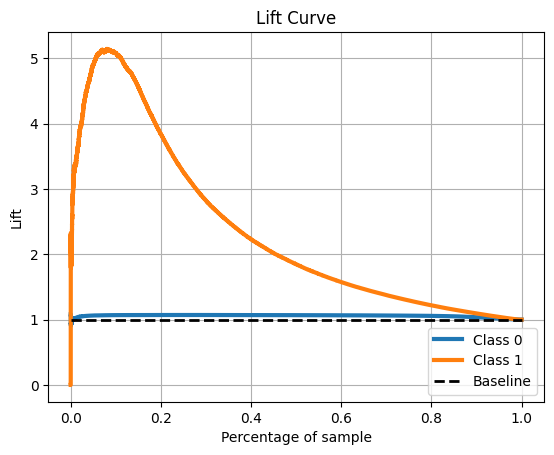

In [58]:
skplt.metrics.plot_lift_curve(y_test, loreg_proba)

Interpretasi

Mengikuti instruksi dari atas, jika dilihat pada 20% desil yang terbaik, maka dapat diketahui dengan menggunakan model yang sudah dibuat akan lebih efektif sebesar 3,9 kali lipat dibandingkan jika tidak menggunakan model sama sekali atau random (baseline) untuk memprediksi apakah customer akan gagal bayar atau tidak

Cummulative Gain Curve

<Axes: title={'center': 'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

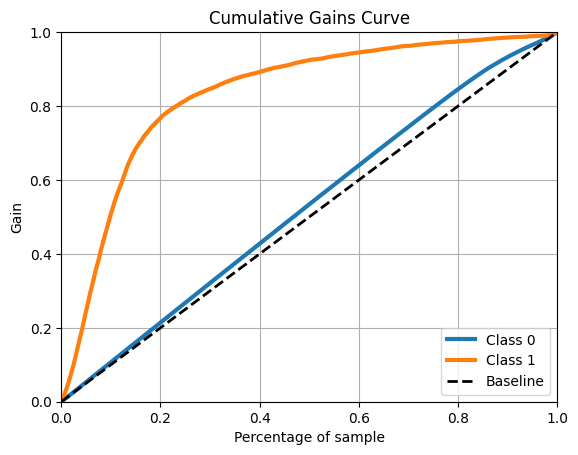

In [59]:
skplt.metrics.plot_cumulative_gain(y_test, loreg_proba)

Interpretasi

Mengikuti instruksi dari atas, jika dilihat pada 20% desil yang terbaik, maka dapat diketahui dengan menggunakan model yang sudah dibuat akan dapat memperoleh hasil sekitar 70% dari kelas target yang diinginkan

Artinya dengan menggunakan 20% desil yang terbaik, maka model sudah dapat memprediksi 70% dari kelas target dengan benar

Business Simulastion

Dengan menggunakan pemisalahan yang sama untuk analisa Profit Curve untuk melakukan simulation, maka diperoleh hasil:

A. Konvensional Prediction (Tanpa Machine Learning)

1. Dengan jumlah sampel 759.338 customer, maka diperkirakan akan ada 56.463 customer yang gagal bayar dan 702.875 customer yang dapat bayar
2. Biaya yang dikeluarkan untuk menutup customer yg gagal bayar misal $150. Maka $150 x 56.463 = $8,469,450

B. Machine Learning Prediction

1. Dengan jumlah sampel 2962 customer, maka diperkirakan akan ada 849 customer yang gagal bayar (True Positive) dan 2113 customer yang dapat bayar (False Positive)
2. Biaya yang dikeluarkan adalah sebesar $150 x 849 = $127,350

Kesimpulan yang dapat ditarik adalah dengan menggunakan machine learning yang dirancang dapat mengurangi %kerugian yang terjadi dengan nilai yang berpotensi hingga 97%. Namun, meskipun demikian machine learning tsb. masih dapat ruang perbaikan kedepannya sehingga bisa menghasilkan profit untuk perusahaan pada akhirnya

